In [1]:
from mnist import MNIST
import numpy as np
from scipy import linalg
import random
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
mndata = MNIST('./data/')
x_train, labels_train = map(np.array, mndata.load_training())
x_test, labels_test = map(np.array, mndata.load_testing())


In [2]:
#labels_train = labels_train[mask_train]
mask_test = ( (labels_test == 7) | (labels_test == 2) )
mask_train = ( (labels_train == 7) | (labels_train == 2) )
x_test = x_test[mask_test,:]
x_train = x_train[mask_train,:]

labels_train = labels_train[mask_train]
labels_test = labels_test[mask_test]
y_train = []
for i in labels_train:
    if i ==2:
        y_train.append(-1)
    else:
        y_train.append(1)
y_train = np.array(y_train).reshape(labels_train.shape[0],1)
y_test = []
for i in labels_test:
    if i ==2:
        y_test.append(-1)
    else:
        y_test.append(1)
y_test = np.array(y_test).reshape(labels_test.shape[0],1)
x_train = x_train/255.0
x_test = x_test/255.0


In [3]:
def gradient_descent(x,y,w,b,L=0.1,steps = 0.05):
    diff = 1
    d = x.shape[1]
    n = x.shape[0]
    mu = 1.0/(1.0+np.exp(-y*(b+x.dot(w))))
    dw = -x*y*(1-mu)
    dw =dw.mean(axis = 0).reshape(x.shape[1],1)
    db = -np.mean(-y *(1-mu))
    w = w - steps*dw
    b = b - steps*db
    return w,b

In [4]:
def cal_result(w,b,x,y,L=0.1):
    cost = np.mean(np.log(1.0+np.exp(-y*(b+x.dot(w))))) + L*float(w.T.dot(w))
    pred = b + x.dot(w)
    pred[pred < 0] = -1
    pred[pred >= 0 ] = 1
    wrong_pred= np.sum(pred != y)
    mislabeled_error = float(wrong_pred) / float(x.shape[0])
    return cost, mislabeled_error
    

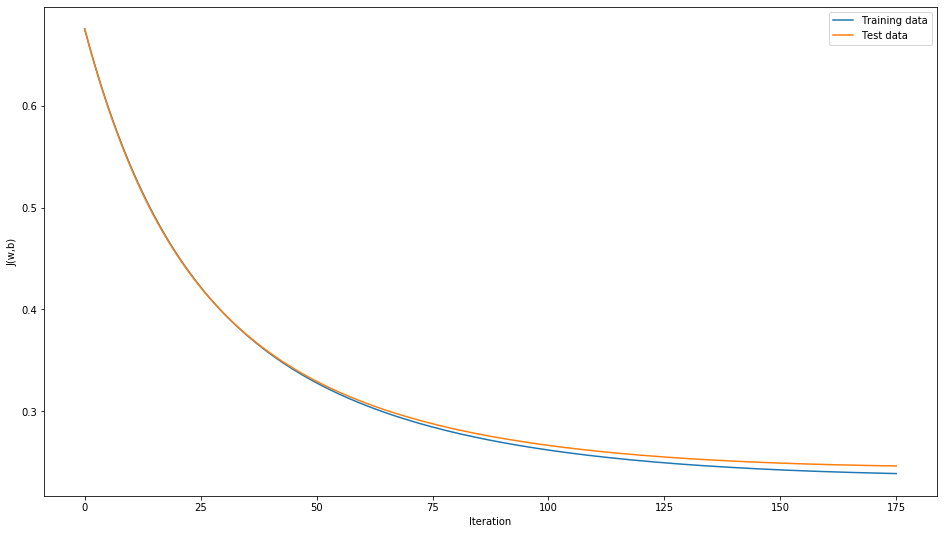

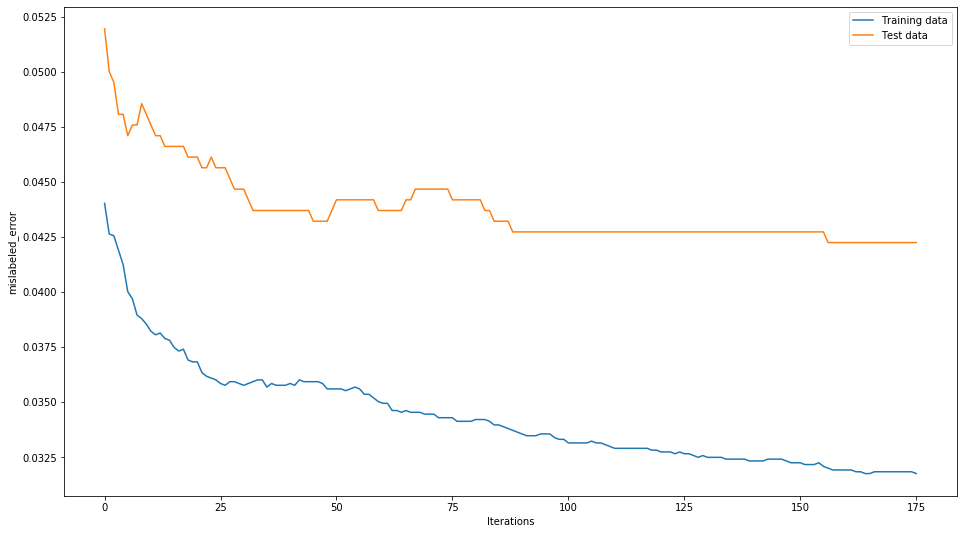

In [6]:
#A6.b1
# iterate 50 times
w = np.zeros(x_train.shape[1]).reshape(x_train.shape[1],1)
b = 0
train_cost = []
test_cost = []
train_mislabeled_error = []
test_mislabeled_error = []
diff = 1
cost_train_prev = 1
cost_train=1
i = 0
while diff > 1e-4:
    w,b = gradient_descent(x_train,y_train,w,b,L=0.1,steps = 0.01)
    cost_train, mislabeled_error_train= cal_result(w,b,x_train,y_train)
    cost_test,mislabeled_error_test = cal_result(w,b,x_test,y_test)
    train_cost.append(cost_train)
    test_cost.append(cost_test)
    train_mislabeled_error.append(mislabeled_error_train)
    test_mislabeled_error.append(mislabeled_error_test)
    diff =  abs(cost_train_prev-cost_train)
    cost_train_prev = cost_train
    i = i+1
fig, ax = plt.subplots(figsize=(16,9))
sns.lineplot(x=range(0,i), y=train_cost, ax=ax, label="Training data")
sns.lineplot(x=range(0,i), y=test_cost, ax=ax, label="Test data")
plt.legend()
ax.set_xlabel("Iteration")
ax.set_ylabel("J(w,b)")
plt.savefig("A62a.png")
fig, ax = plt.subplots(figsize=(16,9))
sns.lineplot(x=range(0,i), y = train_mislabeled_error, ax=ax, label="Training data")
sns.lineplot(x=range(0,i), y = test_mislabeled_error, ax=ax, label="Test data")
plt.legend()
ax.set_xlabel("Iterations")
ax.set_ylabel("mislabeled_error")
plt.savefig("A62b.png")

In [10]:
test_mislabeled_error

[0.5009708737864078,
 0.051941747572815535,
 0.04660194174757282,
 0.04514563106796116,
 0.043689320388349516,
 0.043689320388349516,
 0.043689320388349516,
 0.04466019417475728,
 0.0441747572815534,
 0.04320388349514563,
 0.04271844660194175,
 0.04271844660194175,
 0.04271844660194175,
 0.04271844660194175,
 0.04271844660194175,
 0.04271844660194175,
 0.04271844660194175,
 0.04223300970873786,
 0.04223300970873786]

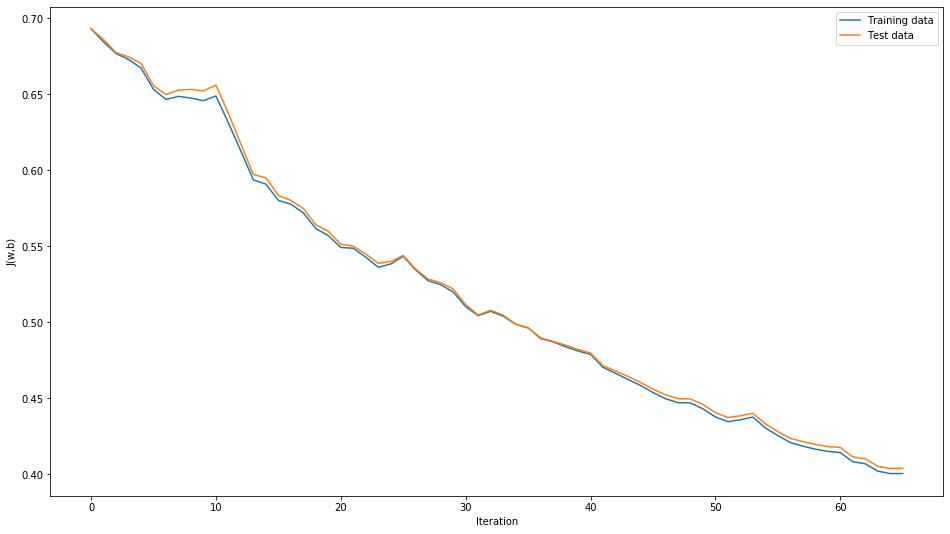

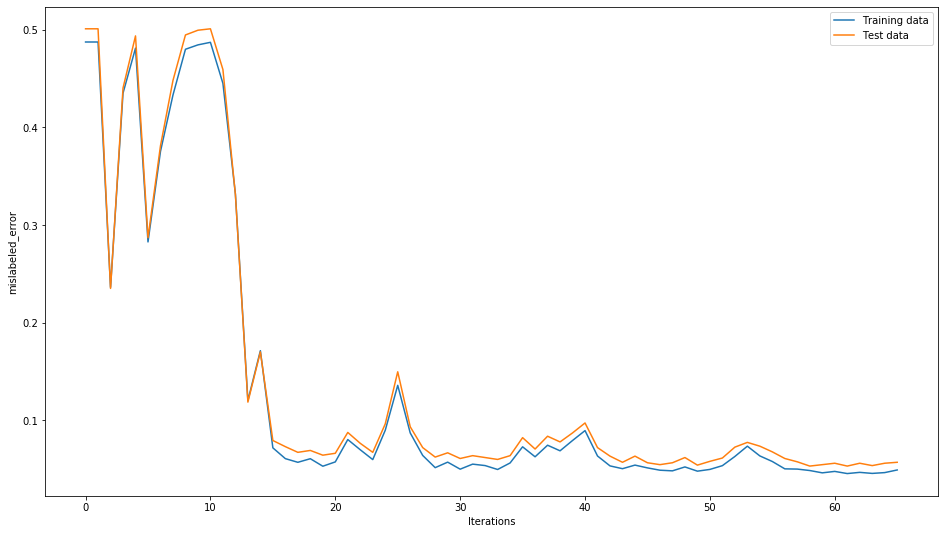

In [60]:
#A6.c batchsize = 1
#**********#
n = x_train.shape[0]
idx = np.random.permutation(n)
x_train = x_train[idx]
y_train = y_train[idx]
#split = n
bs = 1
i =0
w = np.zeros(x_train.shape[1]).reshape(x_train.shape[1],1)
b = 0
train_cost = []
test_cost = []
train_mislabeled_error = []
test_mislabeled_error = []
diff = 1
cost_train_prev = 1
cost_train=1
while diff > 1e-4:
    x = x_train[bs*i:bs*(i+1),:]
    y = y_train[bs*i:bs*(i+1),0].reshape(bs,1)
    cost_train, mislabeled_error_train= cal_result(w,b,x_train,y_train)
    cost_test,mislabeled_error_test = cal_result(w,b,x_test,y_test)
    train_cost.append(cost_train)
    #print(cost_train)
    test_cost.append(cost_test)
    train_mislabeled_error.append(mislabeled_error_train)
    test_mislabeled_error.append(mislabeled_error_test)
    w,b = gradient_descent(x,y,w,b,L=0.1,steps = 0.005)
    diff =  abs(cost_train_prev-cost_train)
    #print(diff)
    i = i+1
    cost_train_prev = cost_train
    
fig, ax = plt.subplots(figsize=(16,9))
sns.lineplot(x=range(0,i), y=train_cost, ax=ax, label="Training data")
sns.lineplot(x=range(0,i), y=test_cost, ax=ax, label="Test data")
plt.legend()
ax.set_xlabel("Iteration")
ax.set_ylabel("J(w,b)")
plt.savefig("A63a.png")
fig, ax = plt.subplots(figsize=(16,9))
sns.lineplot(x=range(0,i), y = train_mislabeled_error, ax=ax, label="Training data")
sns.lineplot(x=range(0,i), y = test_mislabeled_error, ax=ax, label="Test data")
plt.legend()
ax.set_xlabel("Iterations")
ax.set_ylabel("mislabeled_error")
plt.savefig("A63b.png")

(100,)
1
(100,)
2
(100,)
3
(100,)
4
(100,)
5
(100,)
6
(100,)
7
(100,)
8
(100,)
9
(100,)
10
(100,)
11
(100,)
12
(100,)
13
(100,)
14
(100,)
15
(100,)
16
(100,)
17
(100,)
18
(100,)
19
(100,)
20
(100,)
21
(100,)
22
(100,)
23
(100,)
24
(100,)
25
(100,)
26
(100,)
27
(100,)
28
(100,)
29
(100,)
30
(100,)
31
(100,)
32
(100,)
33
(100,)
34
(100,)
35
(100,)
36
(100,)
37
(100,)
38
(100,)
39
(100,)
40
(100,)
41


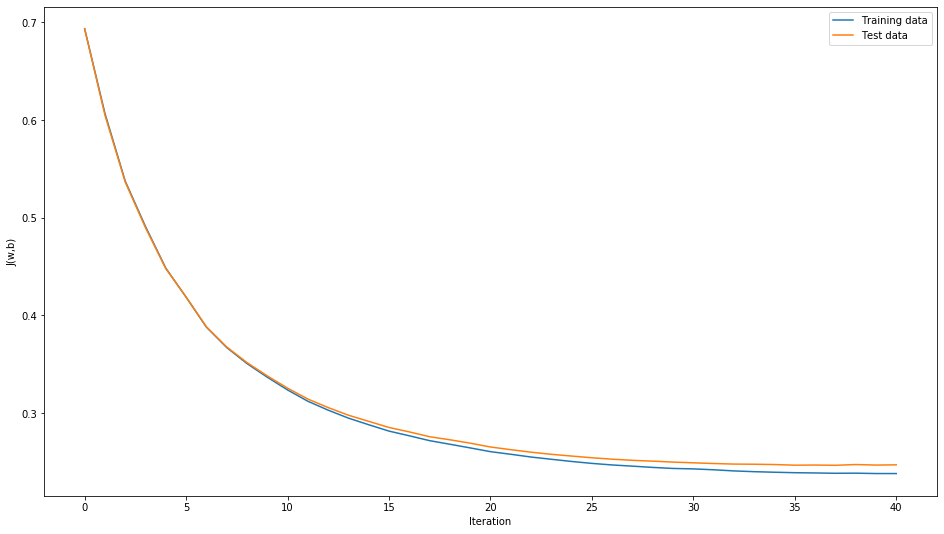

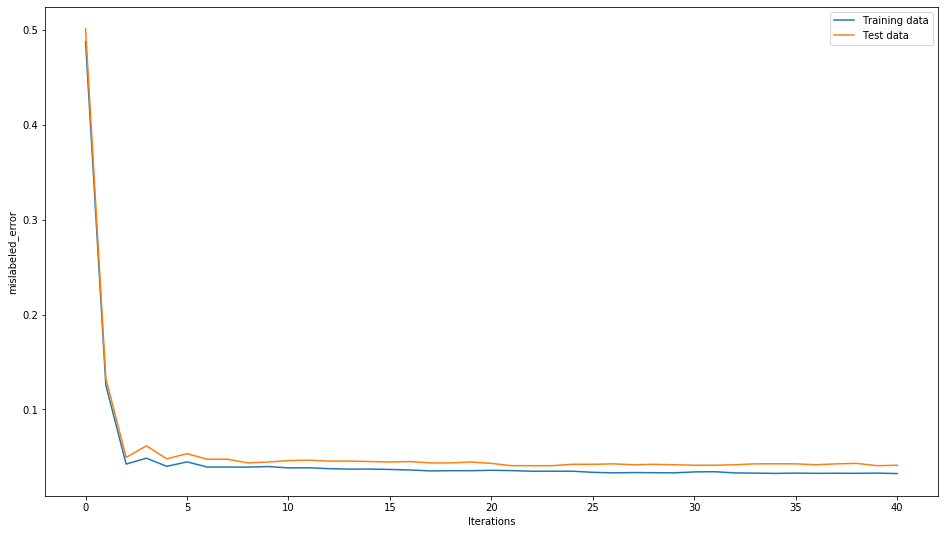

In [61]:
#A6.c batchsize = 100
#**********#
n = x_train.shape[0]
idx = np.random.permutation(n)
x_train = x_train[idx]
y_train = y_train[idx]
bs = 100
i =0
w = np.zeros(x_train.shape[1]).reshape(x_train.shape[1],1)
b = 0
train_cost = []
test_cost = []
train_mislabeled_error = []
test_mislabeled_error = []
diff = 1
cost_train_prev = 1
cost_train=1
while diff > 1e-4:
    x = x_train[bs*i:bs*(i+1),:]
    y = y_train[bs*i:bs*(i+1),0]
    print(y.shape)
    y = y.reshape(bs,1)
    cost_train, mislabeled_error_train= cal_result(w,b,x_train,y_train)
    cost_test,mislabeled_error_test = cal_result(w,b,x_test,y_test)
    train_cost.append(cost_train)
    #print(cost_train)
    test_cost.append(cost_test)
    train_mislabeled_error.append(mislabeled_error_train)
    test_mislabeled_error.append(mislabeled_error_test)
    w,b = gradient_descent(x,y,w,b,L=0.1,steps = 0.05)
    diff =  abs(cost_train_prev-cost_train)
    #print(diff)
    i = i+1
    print(i)
    cost_train_prev = cost_train
    
fig, ax = plt.subplots(figsize=(16,9))
sns.lineplot(x=range(0,i), y=train_cost, ax=ax, label="Training data")
sns.lineplot(x=range(0,i), y=test_cost, ax=ax, label="Test data")
plt.legend()
ax.set_xlabel("Iteration")
ax.set_ylabel("J(w,b)")
plt.savefig("A6da.png")
fig, ax = plt.subplots(figsize=(16,9))
sns.lineplot(x=range(0,i), y = train_mislabeled_error, ax=ax, label="Training data")
sns.lineplot(x=range(0,i), y = test_mislabeled_error, ax=ax, label="Test data")
plt.legend()
ax.set_xlabel("Iterations")
ax.set_ylabel("mislabeled_error")
plt.savefig("A6db.png")

In [ ]:
y_test.shape

In [ ]:
abs(-4)

In [ ]:
\

In [ ]:
cost_train, mislabeled_error_train= cal_result(w,b,x_train,y_train)